In [94]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [95]:
data = np.genfromtxt('../data/test_scores.csv', delimiter=',')

In [96]:
def plotData(x, y, h):
    plt.subplots()
    plt.plot(x, h)
    plt.scatter(x, y, c='red')
    plt.grid(color='gray', linestyle='--', linewidth=.6, axis='both', which='both', alpha=.4)
    plt.show()

In [97]:
def compute_error(b, m, data):
    total_error = 0
    for i in range(0,len(data)):
        x = data[i,0]
        y = data[i,1]
        total_error += (y - (m * x + b)) ** 2
    return total_error/float(len(data))

In [98]:
def step_gradient(b_current, m_current, data, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(data))
    for i in range(0, len(data)):
        x = data[i,0] 
        y = data[i,1] 
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b, new_m]

In [99]:
def gradient_descent_runner(data, initial_b, initial_m, learning_rate,  num_iterations):
    b = initial_b
    m = initial_m
    for i in range(num_iterations):
        b, m = step_gradient(b,m, np.array(data), learning_rate)
    return [b,m]

In [100]:
def run():
    # hyperparaters/learning rate/alpha
    learning_rate = 0.0001
    # y = mx + b (slope formula)
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    cost = compute_error(initial_b, initial_m, data)   
    print("Slope : {}, Y Intercept : {}, Cost : {}".format(initial_b,initial_m, cost)) 
    [b, m] = gradient_descent_runner(data, initial_b, initial_m, learning_rate,  num_iterations)
    print("Slope : {}, Y Intercept : {}, Cost : {}".format(m,b, compute_error(b, m, data))) 
    predictions = data[:,0] * m + b
    plotData(data[:,0], data[:,1],predictions)

Slope : 0, Y Intercept : 0, Cost : 5565.107834483211
Slope : 1.4777440851894448, Y Intercept : 0.08893651993741346, Cost : 112.61481011613473


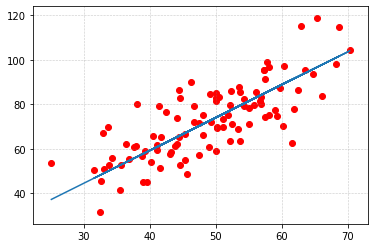

In [101]:
run()

In [102]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])